<a href="https://colab.research.google.com/github/anamarijaeres/Analysis-of-the-Relationship-between-Movie-Titles-and-Corresponding-Ratings-and-Reviews/blob/main/4_1_3_Correlation_between_the_number_of_words_in_the_title_and_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Two analysis are done here:

*   first multiclassification with deep learning models 
  *   input: no. of words in the title
  *   output: one out of 10 classes, each class represents rounded rating {1,2,3,4,5,6,7,8,9,10}   
*   linear regression with keras:
  *   input: no. of words in the title
  *   output: one value between [0-10] 
  *   dataset is split into train_set, validation_set and finnaly for evaluation--test_set
*   linear regression with sklearn
  *   input: no. of words in the title
  *   output: one value between [0-10] 
  *   dataset is split into train_set and for evaluation--test_set



In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [ ]:
#To read/write data from Google Drive:
#Reference: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveAå
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/datase.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,"""mov_galaxy_ID""","""imdbID""","""title""","""rating"""
0,"""001""","""0147800""","""10 Things I Hate About You""","""7.2"""
1,"""003""","""0417385""","""12 and Holding""","""7.6"""
2,"""005""","""1542344""","""127 Hours""","""7.6"""
3,"""006""","""0103594""","""1492: Conquest of Paradise""","""6.5"""
4,"""007""","""0179626""","""15 Minutes""","""6.1"""
...,...,...,...,...
750,"""908""","""0295701""","""xXx""","""5.8"""
751,"""910""","""1068680""","""Yes Man""","""6.8"""
752,"""911""","""0203230""","""You Can Count on Me""","""7.7"""
753,"""913""","""0403702""","""Youth in Revolt""","""6.5"""


In [ ]:
df.columns
df=df.drop(['"imdbID"'], axis=1) 
df=df.drop(['"mov_galaxy_ID"'], axis=1) 
df.head()

,"""title""","""rating"""
0,"""10 Things I Hate About You""","""7.2"""
1,"""12 and Holding""","""7.6"""
2,"""127 Hours""","""7.6"""
3,"""1492: Conquest of Paradise""","""6.5"""
4,"""15 Minutes""","""6.1"""


In [ ]:
df_tensor=tf.convert_to_tensor(df)
df_tensor

<tf.Tensor: shape=(755, 2), dtype=string, numpy=
array([[b'"10 Things I Hate About You"', b'"7.2"'],
       [b'"12 and Holding"', b'"7.6"'],
       [b'"127 Hours"', b'"7.6"'],
       ...,
       [b'"You Can Count on Me"', b'"7.7"'],
       [b'"Youth in Revolt"', b'"6.5"'],
       [b'"Zerophilia"', b'"6.3"']], dtype=object)>

In [ ]:
#This is model for classification problem -- not really sure when I will need it 
def get_basic_model():
  model = tf.keras.Sequential([
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
list_names= df['"title"'].tolist()
list_names[:3]



['"10 Things I Hate About You"', '"12 and Holding"', '"127 Hours"']

In [ ]:
import numpy as np
list_noOfWords=[]
for i in list_names:
  cnt=0
  for j in i:
    if j==" ":
      cnt+=1
  cnt+=1
  list_noOfWords.append([cnt])
print(list_names[:3])
print(list_noOfWords[:3])
list_noOfWords[:3]
#preparing input dataset
list_noOfWords_numpy=np.array(list_noOfWords) 
#list_noOfWords_numpy[:103]

['"10 Things I Hate About You"', '"12 and Holding"', '"127 Hours"']
[[6], [3], [2]]


In [ ]:
#from tensorflow.python.eager.context import num_gpus
list_ratings= df['"rating"'].tolist()
#list_ratings[:3]
list_int_ratings=[]
list_float_ratings_linear=[]
for i in list_ratings:
  num=''
  for j in i:
    if j!= "\"":
      #print(j)
      num+=j
 # print(num)
  if num=="?": # fill missing values with rating 5 
    num='5'
  rating=int(round(float(num)))
  rating_linear=float(num)
  #print(rating)
  list_int_ratings.append([rating])
  list_float_ratings_linear.append([rating_linear])

list_int_ratings_numpy= np.array(list_int_ratings)
list_float_ratings_numpy_linear= np.array(list_float_ratings_linear)
list_int_ratings_numpy[:3]


array([[7],
       [8],
       [8]])

In [ ]:
x_val = tf.convert_to_tensor(np.array(list_noOfWords_numpy[:100]))
x_test=tf.convert_to_tensor(np.array(list_noOfWords_numpy[100:200]))
partial_x_train = tf.convert_to_tensor(np.array(list_noOfWords_numpy[200:]))

#this values are used for multiclassification
y_val = tf.convert_to_tensor(np.array(list_int_ratings_numpy[:100]))
y_test_numpy=np.array(list_int_ratings_numpy[100:200])
y_test= tf.convert_to_tensor(y_test_numpy)
partial_y_train = tf.convert_to_tensor(np.array(list_int_ratings_numpy[200:]))

#this values are used for linear regression
y_val_linear = tf.convert_to_tensor(np.array(list_float_ratings_numpy_linear[:100]))
y_test_linear= tf.convert_to_tensor(np.array(list_float_ratings_numpy_linear[100:200]))
partial_y_train_linear = tf.convert_to_tensor(np.array(list_float_ratings_numpy_linear[200:]))


In [ ]:
#i'm not using this for now
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(partial_x_train)
normalizer(partial_x_train[:3])

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.4529574 ],
       [2.0756533 ],
       [0.20756516]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
#model.add(normalizer)
#model.add(tf.keras.layers.Dense(1, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(Dense(10,activation='sigmoid'))


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
              # optimizer='adam',
              #loss='categorical_crossentropy', metrics=['accuracy'])
              #loss=tf.losses.BinaryCrossentropy(from_logits=True),
              #metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])
              #loss='mean_squared_error')
              #metrics=['mean_squared_error'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)
model.summary()

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 79ms/step - loss: 2.9414 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.9275 - val_sparse_categorical_accuracy: 0.0100
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 2.8883 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.8730 - val_sparse_categorical_accuracy: 0.0100
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 2.8359 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.8196 - val_sparse_categorical_accuracy: 0.0100
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 2.7858 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.7676 - val_sparse_categorical_accuracy: 0.0100
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 2.7360 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.7172 - val_sparse_categorical_accuracy: 0.0100
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 2.6887 - sparse_categorical_ac

Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [ ]:
results = model.evaluate(x_test, y_test)

print(results)
#poor results due to lack of examples in train set

4/4 [==============================] - 0s 3ms/step - loss: 1.3768 - sparse_categorical_accuracy: 0.3500
[1.376792550086975, 0.3499999940395355]


In [ ]:
res=model.predict(x_test)
print(res[:10])
print(y_test[:10])

[[0.01412556 0.00187853 0.0178422  0.01673561 0.14743623 0.721802
  0.87234044 0.9243419  0.90184474 0.6063461 ]
 [0.01412556 0.00187853 0.0178422  0.01673561 0.14743623 0.721802
  0.87234044 0.9243419  0.90184474 0.6063461 ]
 [0.04006752 0.01046443 0.04475909 0.04518202 0.2187823  0.6568481
  0.80644923 0.8854077  0.8544616  0.50528604]
 [0.04006752 0.01046443 0.04475909 0.04518202 0.2187823  0.6568481
  0.80644923 0.8854077  0.8544616  0.50528604]
 [0.01412556 0.00187853 0.0178422  0.01673561 0.14743623 0.721802
  0.87234044 0.9243419  0.90184474 0.6063461 ]
 [0.04006752 0.01046443 0.04475909 0.04518202 0.2187823  0.6568481
  0.80644923 0.8854077  0.8544616  0.50528604]
 [0.01412556 0.00187853 0.0178422  0.01673561 0.14743623 0.721802
  0.87234044 0.9243419  0.90184474 0.6063461 ]
 [0.10841379 0.05608848 0.10782531 0.11626297 0.3120181  0.5854389
  0.71755964 0.83011997 0.7895427  0.4037922 ]
 [0.04006752 0.01046443 0.04475909 0.04518202 0.2187823  0.6568481
  0.80644923 0.8854077  0

Predicted:7   true value:[8]
Predicted:7   true value:[6]
Predicted:7   true value:[8]
Predicted:7   true value:[6]
Predicted:7   true value:[6]
Predicted:7   true value:[7]
Predicted:7   true value:[7]
Predicted:7   true value:[7]
Predicted:7   true value:[7]
Predicted:7   true value:[8]
Predicted:7   true value:[6]
Predicted:7   true value:[7]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[6]
Predicted:7   true value:[7]
Predicted:7   true value:[7]
Predicted:7   true value:[6]
Predicted:7   true value:[8]
Predicted:7   true value:[6]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[7]
Predicted:7   true value:[6]
Predicted:7   true value:[8]
Predicted:7   true value:[7]
Predicted:7   true value:[7]
Predicted:7   true value:[6]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[8]
Predicted:7   true value:[7]
Predicted:7   

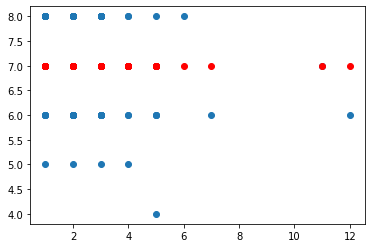

In [ ]:
import matplotlib.pyplot as plt
#print(max(res[0]))
res2=[]
for ind,r in enumerate(res):
  print("Predicted:" +str(np.argmax(r))+ "   true value:"+str(y_test_numpy[ind]))
  res2.append(np.argmax(r))
plt.scatter(x_test,y_test)
plt.scatter(x_test,res2, color='red')

Linear regression using tf.keras.experimental.LinearModel-- difference between this one and sklearn is that test set is divided in half for test and validation-- this is why results are a bit different


In [ ]:

model = tf.keras.experimental.LinearModel()
model.compile(optimizer='sgd', loss='mse')
model.fit(partial_x_train, partial_y_train_linear, epochs=200,batch_size=256,
                    validation_data=(x_val, y_val_linear),
                    verbose=1)
model.summary()

Epoch 1/200
3/3 [==============================] - 0s 63ms/step - loss: 41.4590 - val_loss: 21.3224
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 18.9255 - val_loss: 14.4880
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 13.3881 - val_loss: 12.6308
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 11.8082 - val_loss: 11.8217
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 11.0998 - val_loss: 11.4124
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 10.7205 - val_loss: 11.0879
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 10.4100 - val_loss: 10.7569
Epoch 8/200
3/3 [==============================] - 0s 13ms/step - loss: 10.1049 - val_loss: 10.4678
Epoch 9/200
3/3 [==============================] - 0s 16ms/step - loss: 9.8288 - val_loss: 10.1706
Epoch 10/200
3/3 [==============================] - 0s 14ms/step - loss: 9.5553 - val_loss: 9.8921
Ep

In [ ]:
results = model.evaluate(x_test, y_test)

print(results)

4/4 [==============================] - 0s 4ms/step - loss: 0.9005
0.9005107879638672


In [ ]:
res=model.predict(x_test)
print(res[:10])
print(y_test[:10])

[[6.955274 ]
 [6.955274 ]
 [6.8790526]
 [6.8790526]
 [6.955274 ]
 [6.8790526]
 [6.955274 ]
 [6.8028316]
 [6.8790526]
 [6.8790526]]
tf.Tensor(
[[8]
 [6]
 [8]
 [6]
 [6]
 [7]
 [7]
 [7]
 [7]
 [8]], shape=(10, 1), dtype=int64)


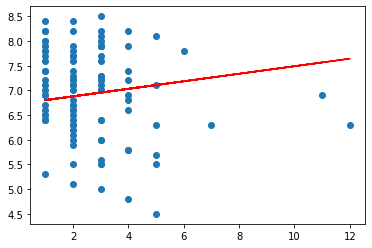

In [ ]:
plt.scatter(x_test,y_test_linear)
plt.plot(x_test,res, color='red')

**Using LinearRegression from sklearn**

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
#preparing train set
x_val_regression = np.array(list_noOfWords_numpy[:200])
partial_x_train_regression = np.array(list_noOfWords_numpy[200:])


y_val_linear_regression = np.array(list_float_ratings_numpy_linear[:200])
partial_y_train_linear_regression = np.array(list_float_ratings_numpy_linear[200:])

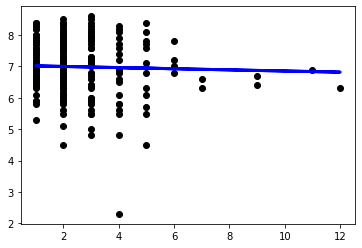

In [ ]:
#Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(partial_x_train_regression,partial_y_train_linear_regression)

test=x_val_regression[0].reshape(1,-1)
y_pred=reg.predict(x_val_regression)

#print(y_pred)
#print(y_val_linear_regression[0])
# Plot outputs
plt.scatter(x_val_regression, y_val_linear_regression, color="black")
plt.plot(x_val_regression, y_pred, color="blue", linewidth=3)

